## Atividades sugeridas:

1. Treine o agente usando **Q-Learning** para o ambiente `MountainCar` usando os melhores hiperparâmetros encontrados na atividade anterior.
2. Execute o treinamento *N* vezes onde este *N* precisa ser maior ou igual a 5.
3. Colete todos os dados para criar a curva de aprendizado.
4. Armazene os pesos da **Q-table**.
5. Implemente o **Deep Q-Learning** para o ambiente `MountainCar`.
6. Execute o treinamento *N* vezes onde este *N* precisa ser maior ou igual a 5.
7. Encontre os melhores hiperparâmetros para o **Deep Q-Learning**.
8. Colete todos os dados para criar a curva de aprendizado.
9. Armazene os pesos da **rede neural**.
10. Compare os resultados obtidos com o **Q-Learning** e o **Deep Q-Learning** usando um **plot**.  
    - Tente deixar claro no gráfico qual a meta de recompensa acumulada para o ambiente `MountainCar`.
11. Crie outro gráfico que mostra o desempenho de ambos os agentes durante o processo de **inferência**, ou seja, quando o agente está atuando sem treinamento.


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import torch
from torch import nn
from DeepQLearning import DeepQLearning
from learning import Agent

env = gym.make('MountainCar', max_episode_steps=400)
#env.seed(0)
np.random.seed(42)

## pytorch model
model = nn.Sequential(
            nn.Linear(env.observation_space.shape[0],512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,env.action_space.n)
        )

criterion = nn.MSELoss()# MSE
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)# ADAM


d_params = {
    "env":env,
    "gamma" : 0.99,
    "epsilon" : 1.0,
    "epsilon_min" : 0.01,
    "epsilon_dec" : 0.99,
    "episodes" : 400,
    "batch_size" : 128,
    "memory" : deque(maxlen=10000), #talvez usar uma memoria mais curta
    "model" : model,
    "criterion" : criterion,
    "optimizer" : optimizer,
    "max_steps" : 400,
}


q_params = {
    "epsilon":0.9,
    "alpha":0.3,
    "gamma":0.99,
    "e_dec":0.999,
    "e_min":0.01,
    "algo":"q-learning",
    "env":env,
    "cont":True,
    "training":True,
    "max_episodes": 400}






/home/andre/miniconda3/envs/cuda/lib/python3.8/site-packages/gymnasium/envs/registration.py:527: UserWarning: WARN: Using the latest versioned environment `MountainCar-v0` instead of the unversioned environment `MountainCar`.
  logger.warn(


In [2]:
import seaborn as sns
import pandas as pd
def plot_rewards_with_ci(avg_list):
    min_length = min(len(rewards) for rewards in avg_list)
    truncated_avg_list = [rewards[:min_length] for rewards in avg_list]
    
    df = pd.DataFrame(truncated_avg_list).T
    
    df_melted = df.reset_index().melt(id_vars='index', var_name='run', value_name='avg_reward')
    
    plt.figure(figsize=(12, 6))
    sns.set_style("darkgrid")
    
    ax = sns.lineplot(
        data=df_melted,
        x='index',
        y='avg_reward',
        ci=95,
        linewidth=2
    )
    
    ax.set_title('Average Rewards with 95% Confidence Interval', fontsize=16)
    ax.set_xlabel('Episodes (after initial 10 episodes)', fontsize=14)
    ax.set_ylabel('Average Reward (10-episode window)', fontsize=14)
    
    plt.legend(['Mean', '95% CI'])
    
    plt.tight_layout()
    plt.show()
    

In [3]:
def rolling(rewards,window):
    for i in range(window,len(rewards)):
         rewards[i-window:i].mean()
    return rewards

In [4]:
q_list = []
highest = -10000000
for i in range(5):
    Q = Agent(**q_params)
    rewards = np.array(Q.execute())
    q_list.append(rolling(rewards,50))
    
    print(f"run {i}")

run 0
run 1
run 2
run 3
run 4


In [5]:
print(q_list[0].mean())

-399.4275


In [6]:
d_list = []

highest = -100000

for i in range(5):
    DQN = DeepQLearning(**d_params)
    rewards = np.array(DQN.train())

    
    d_list.append(rolling(rewards,50))

    torch.save(DQN.model, f'data/deep_{i}.pt')

    print(f"run {i}")










Episódio: 1/400. Score: -367.0
Episódio: 2/400. Score: -400.0
Episódio: 3/400. Score: -400.0
Episódio: 4/400. Score: -400.0
Episódio: 5/400. Score: -400.0
Episódio: 6/400. Score: -400.0
Episódio: 7/400. Score: -400.0
Episódio: 8/400. Score: -400.0
Episódio: 9/400. Score: -400.0
Episódio: 10/400. Score: -400.0
Episódio: 11/400. Score: -400.0
Episódio: 12/400. Score: -400.0
Episódio: 13/400. Score: -400.0
Episódio: 14/400. Score: -400.0
Episódio: 15/400. Score: -400.0
Episódio: 16/400. Score: -400.0
Episódio: 17/400. Score: -400.0
Episódio: 18/400. Score: -400.0
Episódio: 19/400. Score: -400.0
Episódio: 20/400. Score: -400.0
Episódio: 21/400. Score: -400.0
Episódio: 22/400. Score: -400.0
Episódio: 23/400. Score: -400.0
Episódio: 24/400. Score: -400.0
Episódio: 25/400. Score: -400.0
Episódio: 26/400. Score: -400.0
Episódio: 27/400. Score: -400.0
Episódio: 28/400. Score: -400.0
Episódio: 29/400. Score: -400.0
Episódio: 30/400. Score: -400.0
Episódio: 31/400. Score: -400.0
Episódio: 32/400.

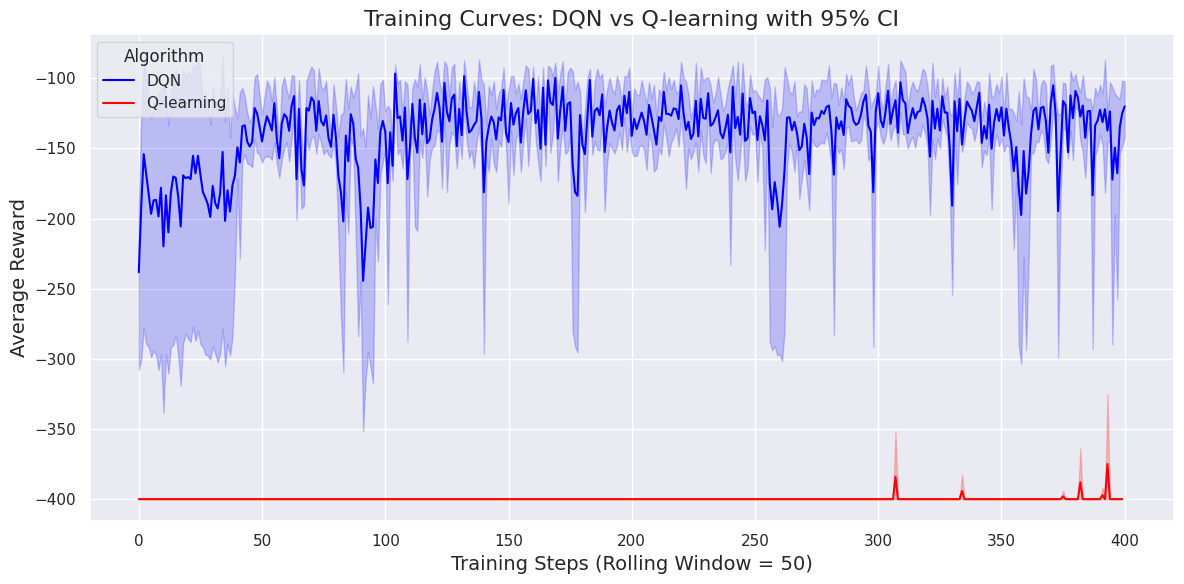

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def prepare_data_for_seaborn(d_list, q_list):
    all_data = []
    
    for run_idx, run_data in enumerate(d_list):
        for step_idx, reward in enumerate(run_data):
            all_data.append({
                'Algorithm': 'DQN',
                'Run': run_idx,
                'Step': step_idx,
                'Reward': reward
            })
    
    for run_idx, run_data in enumerate(q_list):
        for step_idx, reward in enumerate(run_data):
            all_data.append({
                'Algorithm': 'Q-learning',
                'Run': run_idx,
                'Step': step_idx,
                'Reward': reward
            })
    
    return pd.DataFrame(all_data)

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

df = prepare_data_for_seaborn(d_list, q_list)

sns.lineplot(
    data=df,
    x='Step',
    y='Reward',
    hue='Algorithm',
    errorbar=('ci', 95),
    palette=['blue', 'red']
)

plt.title('Training Curves: DQN vs Q-learning with 95% CI', fontsize=16)
plt.xlabel('Training Steps (Rolling Window = 50)', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)
plt.legend(title='Algorithm')

plt.tight_layout()
plt.show()